In [836]:
import matplotlib.pylab as plt
import numpy as np
from osgeo import gdal
import osr

# from scipy import misc
# raster = misc.imread('HillslopeOnlyVeg.tif')

In [837]:
%matplotlib inline

slope: dx=0.5, dy =-0.5, x0=183434.6 , y0=585050.5 


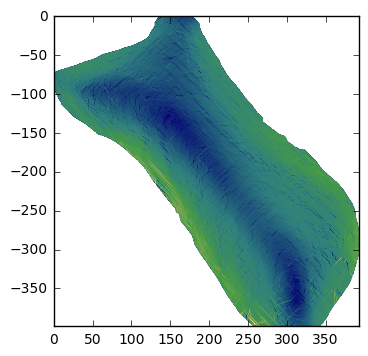

In [952]:
# 1. DEM of the hillslope (HillslopeDEM.tif).
ds = gdal.Open("dem files/HillslopeDEM.tif")
dem = np.array(ds.GetRasterBand(1).ReadAsArray())
dem[dem < -1e5] = np.nan 
# 2.  A slope inclination layer (Dem_Slope.tif)
ds = gdal.Open("dem files/Dem_Slope.tif")
slope = np.array(ds.GetRasterBand(1).ReadAsArray())
slope[slope< -1] = np.nan

nrows, ncols = slope.shape
x0, dx, dxdy, y0, dydx, dy = ds.GetGeoTransform()
print "slope: dx={0:.1f}, dy ={1:.1f}, x0={2:.1f} , y0={3:.1f} ".format(dx, dy, x0, y0)
x0 = 0; 
y0 = 0;
x1 = x0 + dx * ncols
y1 = y0 + dy * nrows
plt.imshow(slope, cmap='gist_earth', extent=[x0, x1, y1, y0])

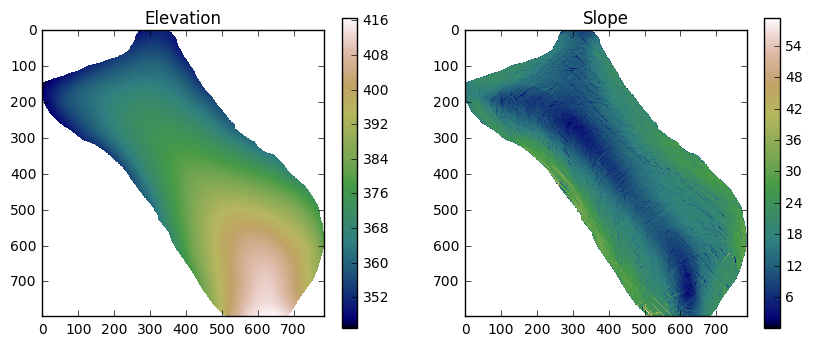

In [953]:

plt.figure(figsize = (10, 4))
plt.subplot(121)
plt.imshow(dem, cmap='gist_earth',interpolation='none')
plt.colorbar()
plt.title('Elevation')


plt.subplot(122)
plt.imshow(slope, cmap='gist_earth',interpolation='none')
plt.colorbar()
plt.title('Slope')

# plt.imshow(slope, cmap='gist_earth', extent=[x0, x1, y1, y0])

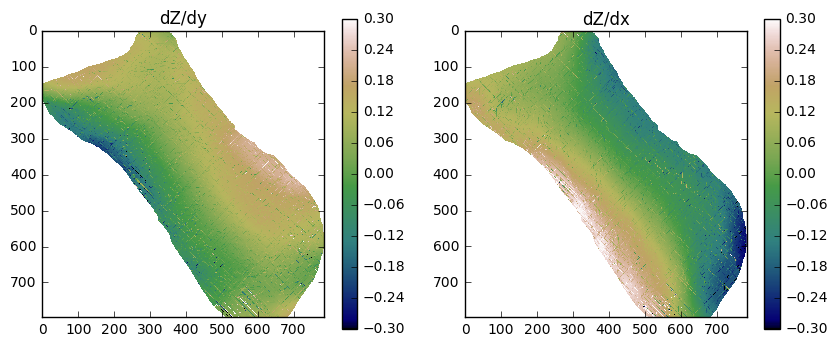

In [964]:
dzdy = dem[1:] - dem[:-1]
plt.figure(figsize = (10, 4))
plt.subplot(121)
plt.imshow(dzdy, cmap='gist_earth',interpolation='none',
       vmin=-0.3, vmax = .3)
plt.colorbar()
plt.title('dZ/dy')

dzdx = dem[:, 1:] - dem[:, :-1]
plt.subplot(122)
plt.imshow(dem[:, 1:] - dem[:, :-1], cmap='gist_earth',interpolation='none',
                  vmin=-0.3, vmax = .3)
plt.colorbar()
plt.title('dZ/dx')

# plt.imshow(slope, cmap='gist_earth', extent=[x0, x1, y1, y0])

In [965]:
# 3. A classification of the high resolution Orthophoto of lehavim. (HillslopeClassification.tif)
ds = gdal.Open("dem files/HillslopeClassification.tif")
ortho = np.array(ds.GetRasterBand(1).ReadAsArray(), dtype = float)
ortho[ortho == 255] = np.nan

# 4. A layer that has only the vegetation component of the above classification (HillslopeOnlyVeg.tif).

ds = gdal.Open("dem files/HillslopeOnlyVeg.tif")
veg = np.array(ds.GetRasterBand(1).ReadAsArray())

In [1349]:
dx = 500
dy = 500
xi = 2000; xf = xi + dx
yi = 2700; yf = yi + dy


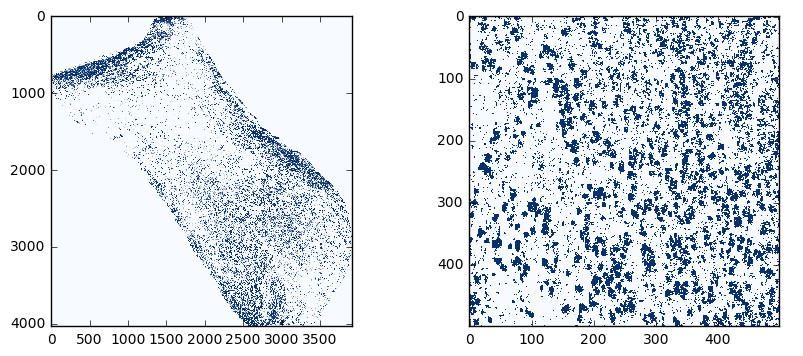

In [1350]:
plt.figure(figsize = (10, 4))
ax = plt.subplot(121)
plt.imshow(veg, cmap='Blues')
# print dem.shape
ax = plt.subplot(122)
plt.imshow(veg[yi:yf,xi:xf], cmap='Blues', interpolation='none')   

In [1351]:
testveg = veg[yi:yf,xi:xf]
testortho = ortho[yi:yf,xi:xf]
Nx = testveg.shape[1]
Ny = testveg.shape[0]

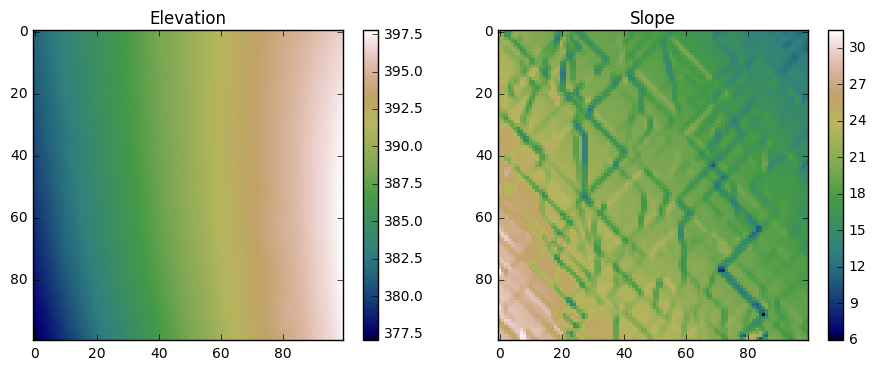

In [1352]:
# 1. DEM of the hillslope (HillslopeDEM.tif).

plt.figure(figsize = (11, 4))
plt.subplot(121)
plt.imshow(dem[ yi/5:yi/5+ dy/5,xi/5:xi/5 + dx/5], 
           cmap='gist_earth', interpolation='none')
plt.colorbar()
plt.title('Elevation')

# 2.  A slope inclination layer (Dem_Slope.tif)

plt.subplot(122)
plt.imshow(slope[yi/5:yi/5+ dy/5,xi/5:xi/5 + dx/5], 
           cmap='gist_earth',interpolation='none')
plt.colorbar()
plt.title('Slope')

# plt.imshow(slope, cmap='gist_earth', extent=[x0, x1, y1, y0])

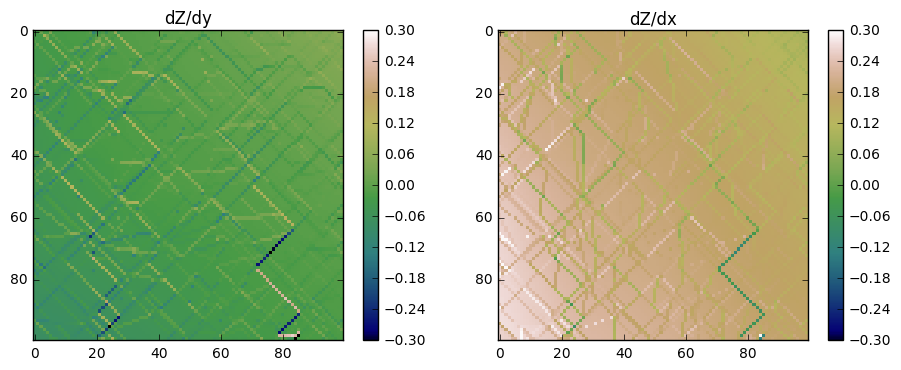

In [1353]:
plt.figure(figsize = (11, 4))
plt.subplot(121)
plt.imshow(dzdy[yi/5:yi/5+ dy/5,xi/5:xi/5 + dx/5], 
           cmap='gist_earth',interpolation='none',vmin=-0.3, vmax = .3)
plt.colorbar()
plt.title('dZ/dy')

plt.subplot(122)
plt.imshow(dzdx[ yi/5:yi/5+ dy/5,xi/5:xi/5 + dx/5], 
           cmap='gist_earth',interpolation='none', vmin=-0.3, vmax = .3)
plt.colorbar()
plt.title('dZ/dx')

# dzdy[xi/5:xi/5 + 100, yi/5:yi/5+ 100].mean()
# dzdx[xi/5:xi/5 + 100, yi/5:yi/5+ 100].mean()

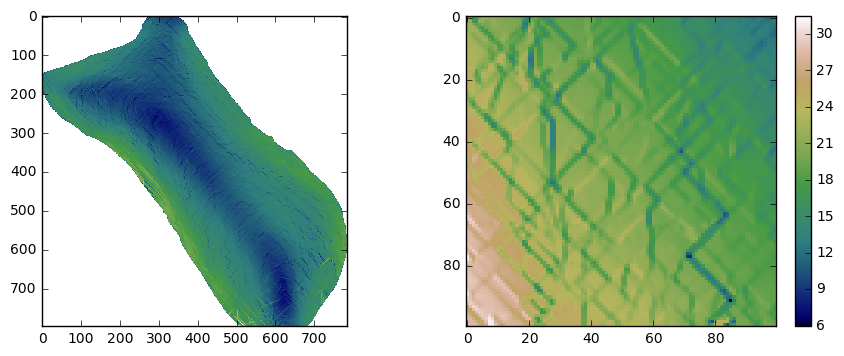

In [1354]:
plt.figure(figsize = (11, 4))
ax = plt.subplot(121)
plt.imshow(slope, cmap='gist_earth', interpolation='none')
# print dem.shape
ax = plt.subplot(122)
plt.imshow(slope[yi/5:yi/5+ dy/5,xi/5:xi/5 + dx/5], 
           cmap='gist_earth',interpolation='none')
plt.colorbar()

In [1355]:
f = open("veg_example/ti.gslib", "w")
f.write('{0} {0} 1 1 1 1 0 0 0\n'.format(Nx, Ny))
f.write('1\n')
f.write('veg\n')
for i in range(Ny):
    for j in range(Nx):
        f.write(' {}\n'.format(str(testveg[i,j])))

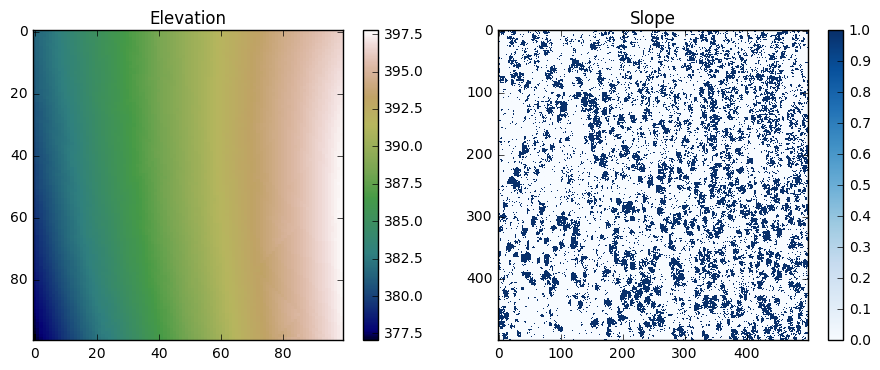

In [1356]:
# 1. DEM of the hillslope (HillslopeDEM.tif).

plt.figure(figsize = (11, 4))
plt.subplot(121)
plt.imshow(dem[ yi/5:yi/5+ dy/5,xi/5:xi/5 + dx/5], 
           cmap='gist_earth', interpolation='none')
plt.colorbar()
plt.title('Elevation')

# 2.  A slope inclination layer (Dem_Slope.tif)

plt.subplot(122)
plt.imshow(veg[yi:yi+ dy,xi:xi+ dx],
           cmap='Blues',interpolation='none')
plt.colorbar()
plt.title('Slope')

# plt.imshow(slope, cmap='gist_earth', extent=[x0, x1, y1, y0])

In [1382]:
xspaces = []
count = 0
for i in range(0, Ny):
    for j in range(0, Nx):
        if testveg[i, j] == 0:
            count += 1
        elif testveg[i,j] ==1 and testveg[i, j-1] ==0:
            xspaces.append(count)
            count = 0
    

In [1383]:
yspaces = []
count = 0
for j in range(0, Nx):
    for i in range(0, Ny):
        if testveg[i, j] ==0:
            count += 1
        elif testveg[i, j] == 1 and testveg[i-1, j] ==0:
            yspaces.append(count)
            count = 0


In [1401]:
xspaces = np.array(xspaces)
xspaces = xspaces[xspaces > 0]

In [1397]:
np.log(xspaces)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


array([ 1.38629436,  1.60943791,  0.        , ...,  0.        ,
        2.77258872,  1.94591015])

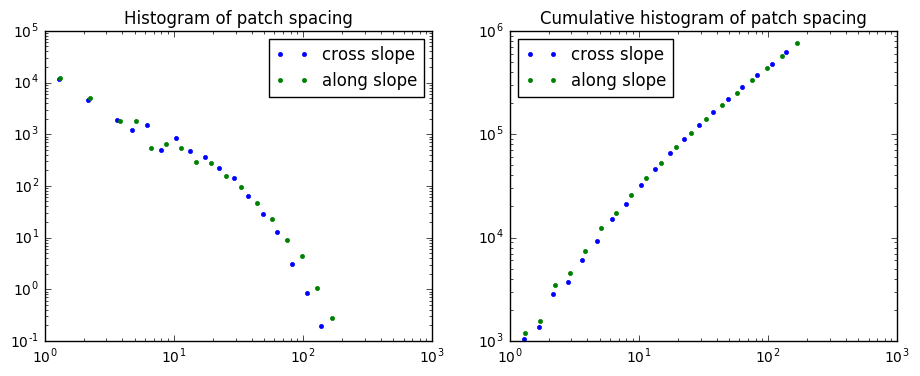

In [1384]:
plt.figure(figsize = (11, 4))

plt.subplot(121)
xtest = plt.histogram(xspaces, bins=np.logspace(0.0, np.log10(max(xspaces)), 20))
counts = xtest[0]; bins = xtest[1]
norm  = bins[1:] - bins[:-1]
plt.loglog(bins[1:], counts/norm, '.', label = 'cross slope')

ytest = plt.histogram(yspaces, bins=np.logspace(0.0, np.log10(max(yspaces)), 20))
counts = ytest[0]; bins = ytest[1]
norm  = bins[1:] - bins[:-1]
plt.loglog(bins[1:], counts/norm, '.', label = 'along slope')
plt.legend(loc = 'best')
plt.title('Histogram of patch spacing')


plt.subplot(122)
xtest = plt.histogram(xspaces, bins=np.logspace(0.0, np.log10(max(xspaces)), 20))
counts = xtest[0]; bins = xtest[1]
norm  = bins[1:] - bins[:-1]
plt.loglog(bins[1:], np.cumsum(counts)*norm, '.', label = 'cross slope')

ytest = plt.histogram(yspaces, bins=np.logspace(0.0, np.log10(max(yspaces)), 20))
counts = ytest[0]; bins = ytest[1]
norm  = bins[1:] - bins[:-1]
plt.loglog(bins[1:], np.cumsum(counts)*norm, '.', label = 'along slope')
plt.legend(loc = 'best')
plt.title('Cumulative histogram of patch spacing')
# # plt.imshow(slope, cmap='gist_earth', extent=[x0, x1, y1, y0])

In [1385]:
import powerlaw 
results = powerlaw.Fit(xspaces) 
print results.power_law.alpha 
print results.power_law.xmin 


5.88322650067
52.0


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


### Patch size

In [1386]:
import numpy
from scipy import ndimage

s = ndimage.generate_binary_structure(2,2) # iterate structure
s[0, 0] = 0
s[2, 0] = 0
s[2, 2] = 0
s[0, 2] = 0

labeled_array, numpatches = ndimage.label(testveg,s) # labeling

sizes = ndimage.sum(testveg,labeled_array,range(1,numpatches+1)) 
# # To get the indices of all the min/max patches. Is this the correct label id?
map = numpy.where(sizes==sizes.max())[0] + 1 
mip = numpy.where(sizes==sizes.min())[0] + 1

# # inside the largest, respecitively the smallest labeled patches with values
max_index = np.zeros(numpatches + 1, np.uint8)
max_index[map] = 1
max_feature = max_index[labeled_array]

# min_index = np.zeros(numpatches + 1, np.uint8)
# min_index[mip] = 1
# min_feature = min_index[labeled_array]


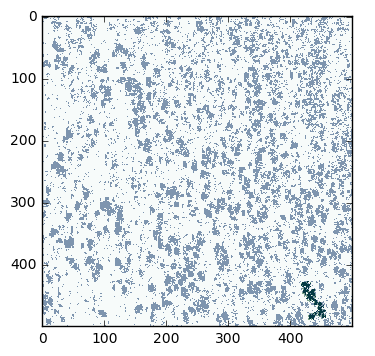

In [1387]:
plt.imshow(testveg, cmap="Blues", interpolation="nearest")
plt.imshow(-max_feature, cmap = 'Greens', interpolation='none', alpha = .5)

In [1388]:
print 'mean patch density = {0:.3f}'.format(np.sum(sizes)/Nx/Ny)
print 'mean patch size = {0:.1f}'.format(float(np.mean(sizes)))


mean patch density = 0.247
mean patch size = 10.8


alpha = 1.85, sigma = 0.02


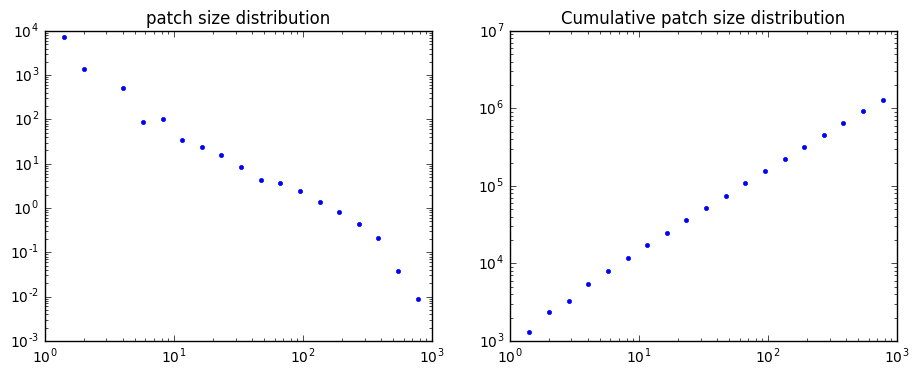

In [1389]:
n = sizes[sizes >= 2].shape[0]
alpha = 1+ n/np.sum(np.log(sizes[sizes >= 2.]/2.))
sigma = (alpha - 1)/np.sqrt(n)
print 'alpha = {0:.2f}, sigma = {1:.2f}'.format(alpha, sigma)


plt.figure(figsize = (11, 4))
plt.subplot(121)
test = plt.histogram(sizes, bins=np.logspace(0.0, np.log10(max(sizes)), 20))
counts = test[0]
bins = test[1]
norm  = bins[1:] - bins[:-1]
plt.loglog(bins[1:], counts/norm, '.')
plt.title('patch size distribution')

plt.subplot(122)
test = plt.histogram(sizes, bins=np.logspace(0.0, np.log10(max(sizes)), 20))
counts = test[0]
bins = test[1]
norm  = bins[1:] - bins[:-1]
plt.loglog(bins[1:], np.cumsum(counts)*norm, '.')
plt.title('Cumulative patch size distribution')


In [1390]:
import powerlaw 
results = powerlaw.Fit(sizes) 
print results.power_law.alpha 
print results.power_law.xmin 


1.85233100944
2.0


Calculating best minimal value for power law fit


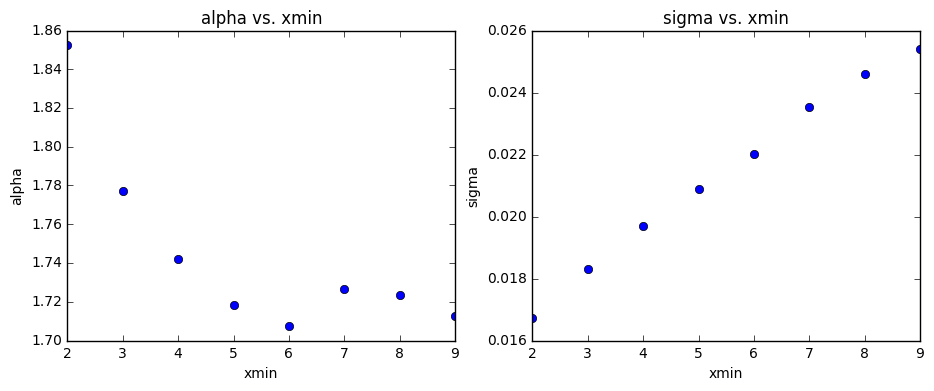

In [1391]:
ns = []
alphas = []
sigmas = []
bins = range(2, 10)
for i in bins:
    ns.append(  sizes[sizes >= i].shape)
    alphas.append(1+ sizes[sizes >= i].shape/np.sum(np.log(sizes[sizes >= i]/i)))
    sigmas.append((alphas[i-bins[0]] - 1)/np.sqrt(ns[i-bins[0]]))
    
plt.figure(figsize=(11, 4))
plt.subplot(121)
plt.plot(bins, alphas, 'o')
plt.title('alpha vs. xmin'); plt.xlabel('xmin');  plt.ylabel('alpha')
plt.subplot(122)
plt.plot(bins, sigmas, 'o')
plt.title('sigma vs. xmin'); plt.xlabel('xmin');  plt.ylabel('sigma')
